need to check each function of aberration- print statements
keep in mind that in spherical coordinates the angles are with respect to the z axis and that in the prof's formula the angles are the one with respect to the velocity.
0.15866629563584814, Phi: 5.204254496855819

In [241]:
#here theta and phi are with respect to the direction of velocity (z direction)
def aberrate(theta, phi, velocity):
    # Calculate aberrated theta and phi
    sol = 3 * 10**8
    b = velocity / sol
    
    
    cos_thet1 = (np.cos(theta)+b) / (1+b*np.cos(theta))
    sin_thet1 = np.sqrt(1-b**2) * (np.sin(theta) / (1 + b*np.cos(theta)))
    
    theta_1 = np.arctan2(sin_thet1, cos_thet1)
    phi_1 = phi
    
    return theta_1, phi_1

#theta_values = np.linspace(0, np.pi, 100)
#theta_1 = aberrate(theta_values, 0, 3e7)
#diff = theta_1 - theta_values

"""plt.plot(theta_values, theta_1)
plt.xlabel('Theta (radians)')
plt.ylabel('aberrated theta (radians)')
plt.title('Aberration Effect')
plt.grid(True)
plt.show()

plt.plot(theta_values, diff)
plt.xlabel('Theta (radians)')
plt.ylabel('deviation')
plt.title('Aberration Effect')
plt.grid(True)
plt.show()"""
print(aberrate(2.22847454,5.204254496855819,6e7))

(2.0584633211655463, 5.204254496855819)


In [242]:
import numpy as np

# Function to normalize vector
def norm(vector):
    magnitude = np.linalg.norm(vector)
    if magnitude == 0:
        return vector
    return vector / magnitude

# Function to aberrate theta and phi values
def aberrate_2(theta, phi, theta_v, phi_v, velocity):
    # Convert velocity direction angles to unit vector
    v_unit = np.array([np.sin(theta_v) * np.cos(phi_v),
                       np.sin(theta_v) * np.sin(phi_v),
                       np.cos(theta_v)])
    v_unit = norm(v_unit)

    aberrated_thetas = []
    aberrated_phis = []

    # Iterate over each theta and phi value
    for t, p in zip(theta, phi):
        # Unit vector of pixel/source
        s_unit = np.array([np.sin(t) * np.cos(p),
                           np.sin(t) * np.sin(p),
                           np.cos(t)])
        s_unit = norm(s_unit)

        cos_alpha = np.dot(v_unit, s_unit)
        alpha = np.arccos(cos_alpha)

        alpha_pri = aberrate(alpha, 0, velocity)[0]

        cos_alpha_vunit = np.multiply(cos_alpha, v_unit)
        u_p = s_unit - (cos_alpha * v_unit)
        u_p = norm(u_p)

        ss_unit = np.cos(alpha_pri) * v_unit + np.sin(alpha_pri) * u_p
        ss_unit = norm(ss_unit)

        theta_1 = np.arccos(ss_unit[2])
        phi_1 = np.arctan2(ss_unit[1], ss_unit[0])

        if phi_1 < 0:
            phi_1 += 2 * np.pi
        elif phi_1 > 2 * np.pi:
            phi_1 -= 2 * np.pi

        aberrated_thetas.append(theta_1)
        aberrated_phis.append(phi_1)

    return aberrated_thetas, aberrated_phis

# Example values
theta = [2.22847454, 2.1936003,  1.91889345, 1.415827,   2.61948761, 1.20952985,
         2.02537618, 0.63202548, 1.30663774, 2.22215623]
phi = [0.61128836, 3.2601171,  2.64627711, 5.35063149, 3.57363857, 0.26685096,
       1.73577847, 3.66655765, 4.90545933, 1.3304763 ]
theta_v = 0
phi_v = 0
velocity = 6e7  # Adjust velocity 

aberrated_thetas, aberrated_phis = aberrate_2(theta, phi, theta_v, phi_v, velocity)
aberrated_coordinates = list(zip(aberrated_thetas, aberrated_phis))
print(aberrated_coordinates)
print("Aberrated coordinates:")
for coord in aberrated_coordinates:
    print(coord)


[(2.0584633211655463, 0.6112883599999999), (2.0196573538753078, 3.2601170999999995), (1.7228225502360297, 2.64627711), (1.219901125712381, 5.35063149), (2.50917129261656, 3.5736385699999995), (1.0275503322659307, 0.26685095999999997), (1.8359958968750412, 1.73577847), (0.5217710487976093, 3.66655765), (1.1171857141698898, 4.90545933), (2.051414425521917, 1.3304763)]
Aberrated coordinates:
(2.0584633211655463, 0.6112883599999999)
(2.0196573538753078, 3.2601170999999995)
(1.7228225502360297, 2.64627711)
(1.219901125712381, 5.35063149)
(2.50917129261656, 3.5736385699999995)
(1.0275503322659307, 0.26685095999999997)
(1.8359958968750412, 1.73577847)
(0.5217710487976093, 3.66655765)
(1.1171857141698898, 4.90545933)
(2.051414425521917, 1.3304763)


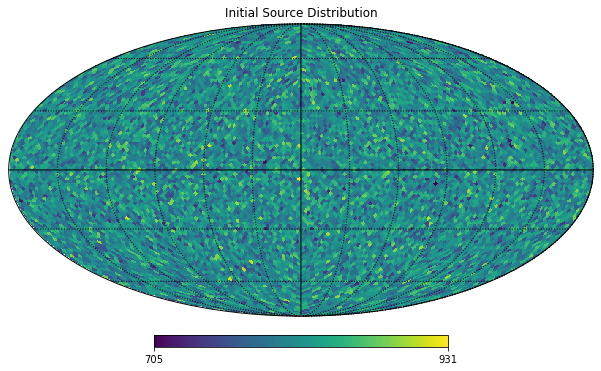

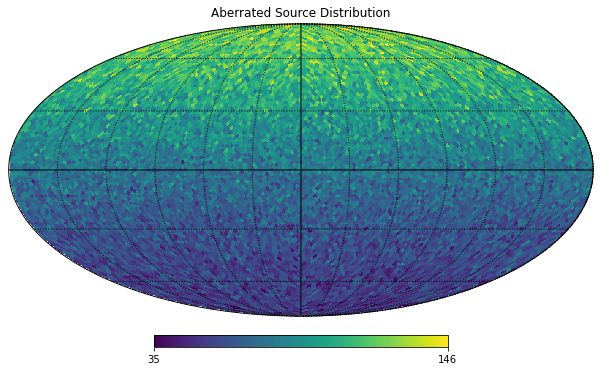

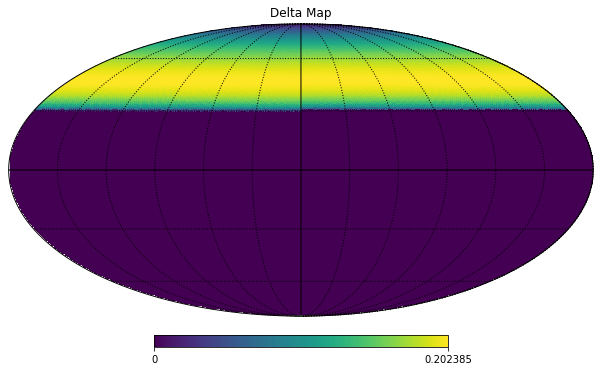

In [299]:
import numpy as np
import healpy as hp

def generate_uniform_sources(num_sources, nside):
    x = np.random.rand(num_sources)
    theta_orig = np.arccos(1 - 2 * x)
    phi_orig = np.random.rand(num_sources) * 2. * np.pi
    idx = hp.ang2pix(nside, theta_orig, phi_orig)
    return idx, theta_orig, phi_orig

num_sources = 10000000  # Adjust as needed
nside = 32 # Adjust as needed
velocity  = 6e7
NPIX = hp.nside2npix(nside)
mean_dens = num_sources / NPIX
# Generate random sources
idx = generate_uniform_sources(num_sources, nside)[0]


# Count how many sources fall into each pixel
count = np.bincount(idx, minlength=hp.nside2npix(nside))

# Plot the HEALPix map
hp.mollview(count, title='Initial Source Distribution')
hp.graticule()
plt.show()

theta_a, phi_a = aberrate(theta_orig, phi_orig, velocity)

ab_idx = hp.ang2pix(nside, theta_a, phi_a)
ab_count = np.bincount(ab_idx,  minlength=hp.nside2npix(nside))

hp.mollview(ab_count, title='Aberrated Source Distribution')
hp.graticule()
plt.show()

#diff = (ab_count - count) / count
#hp.mollview(diff, title='difference in source distribution')
#hp.graticule()
#plt.show()

delta_map = np.zeros(npix)
for source_pixel in idx:
    t , p = hp.pix2ang(nside, source_pixel)
    og_v = np.array([np.sin(t) * np.cos(p), np.sin(t) * np.sin(p), np.cos(t)])
    t_a, p_a = aberrate(t,p,velocity)
    ab_v = np.array([np.sin(t_a) * np.cos(p_a), np.sin(t_a) * np.sin(p_a), np.cos(t_a)])
    
    delt = np.arccos(np.dot(og_v, ab_v))

    delta_map[source_pixel] = delt

hp.mollview(delta_map, title='Delta Map', cmap='viridis')
hp.graticule()
plt.show()

In [244]:
print(mean_dens)

813.8020833333334


In [245]:
import math as m
import numpy as np
import scipy.optimize as optimize
import random as rnd
import matplotlib.pyplot as plt

# Function to calculate the source model
def source_model(tet,phi,beta,N,tet_v,phi_v) :
    p_vect = np.array([np.sin(tet)*np.cos(phi), np.sin(tet)*np.sin(phi),
                    np.cos(tet)])  
    v_vect = np.array([np.sin(tet_v)*np.cos(phi_v), np.sin(tet_v)*np.sin(phi_v),
                    np.cos(tet_v)])   
    udotuvel = np.dot(p_vect, v_vect)
    #udotuvel=(m.sin(tet)*m.sin(tet_v)*m.cos(phi)*m.cos(phi_v))+m.sin(phi)*m.sin(phi_v)
    #udotuvel+=m.cos(tet)*m.cos(tet_v)
    return N*(1+2*beta*udotuvel)

# Define parameters
beta = velocity / 3e8
N = mean_dens
tet_v = 0
phi_v = 0

# Generate random pixel positions

tet_pix = theta_a
phi_pix = phi_a

# Define noise level
noise = 0.005

# Generate pixel values with noise
val_pix = np.zeros(NPIX)
for i in range(val_pix.size):
    val_pix[i] = source_model(tet_pix[i], phi_pix[i], beta, N, tet_v, phi_v)
    val_pix[i] += rnd.gauss(0, noise)

# Function to calculate residuals
def cmb_residuals(param):
    resid = np.zeros(val_pix.size)
    for i in range(val_pix.size):
        resid[i] = (val_pix[i] - source_model(tet_pix[i], phi_pix[i], param[0], param[1], param[2], param[3])) / noise
    return resid

# Fit parameters with bounds
p0cmb = [0., 20, m.pi / 2, m.pi]
bounds = ([0, 0, 0, 0], [1, np.inf, m.pi, 2 * m.pi])
fres = optimize.least_squares(cmb_residuals, p0cmb, bounds=bounds)

# Calculate chi-squared
chi_squared = np.sum(fres.fun**2)

# Print results
print('Velocity Fit result with bounds status =', fres.status, 'NEval =', fres.nfev, 'Chi-squared =', chi_squared)
print('Fit parameters (beta, N, theta_v, phi_v) =', fres.x)

Velocity Fit result with bounds status = 4 NEval = 17 Chi-squared = 11895.644268664008
Fit parameters (beta, N, theta_v, phi_v) = [1.99999905e-01 8.13802107e+02 3.04845189e-07 6.28318531e+00]


Text(0.5, 1.0, 'Original Theta Histogram')

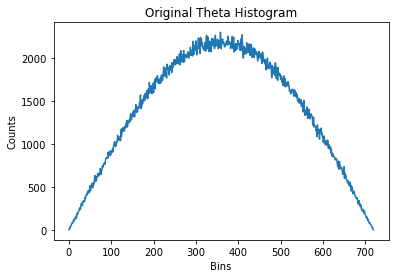

In [246]:
htet=np.histogram(theta_orig, 720, (0, np.pi))
plt.figure()
plt.plot(htet[0])
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Original Theta Histogram')


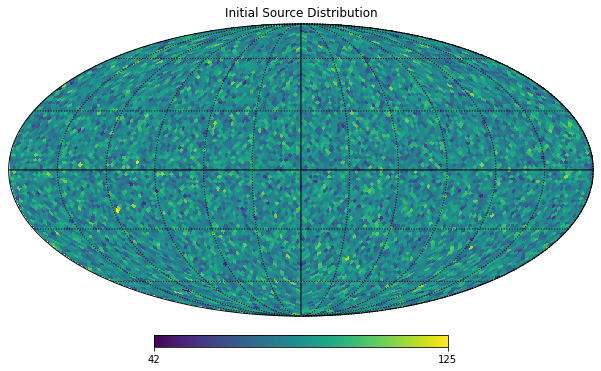

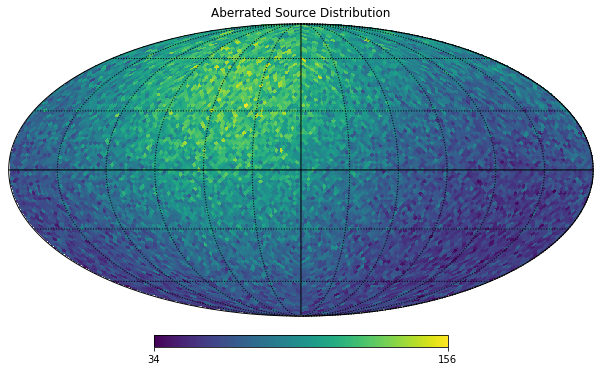

In [304]:
nside = 32
npix = hp.nside2npix(nside)
num_sources = 1000000

# src_idx = generate_uniform_sources(num_sources, nside)
xrnd = np.random.rand(num_sources)
theta_orig = np.arccos(1-2*xrnd)
phi_orig = np.random.rand(num_sources)*2.*np.pi

velocity=6.e7

theta_diffA = np.zeros(num_sources)
phi_diffA = np.zeros(num_sources)

theta_v = np.pi/4
phi_v = np.pi/4
# theta_orig, phi_orig = hp.pix2ang(nside, src_idx)
src_idx = hp.ang2pix(nside, theta_orig, phi_orig)
theta_a, phi_a = aberrate_2(theta_orig, phi_orig,theta_v ,phi_v, velocity)
idxA= hp.ang2pix(nside, theta_a, phi_a)

density_initial = np.bincount(src_idx.astype(int), minlength=npix)
density_aberr = np.bincount(idxA.astype(int), minlength=npix)

hp.mollview(density_initial, title='Initial Source Distribution')
hp.graticule()
plt.show()

hp.mollview(density_aberr, title='Aberrated Source Distribution')
hp.graticule()
plt.show()
    
    


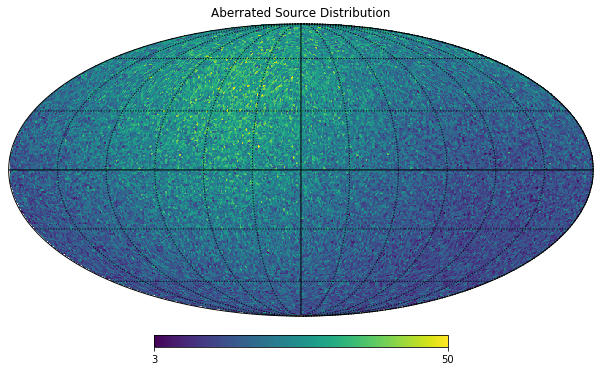

In [303]:
hp.mollview(density_aberr, title='Aberrated Source Distribution')
hp.graticule()
plt.show()
    

In [300]:
mean_dens = num_sources / npix 
print(mean_dens)

203.45052083333334


In [301]:
import math as m
import numpy as np
import scipy.optimize as optimize
import random as rnd
import matplotlib.pyplot as plt

# Function to calculate the source model
def source_model(tet,phi,beta,N,tet_v,phi_v) :
    p_vect = np.array([np.sin(tet)*np.cos(phi), np.sin(tet)*np.sin(phi),
                    np.cos(tet)])  
    v_vect = np.array([np.sin(tet_v)*np.cos(phi_v), np.sin(tet_v)*np.sin(phi_v),
                    np.cos(tet_v)])   
    udotuvel = np.dot(p_vect, v_vect)
    #udotuvel=(m.sin(tet)*m.sin(tet_v)*m.cos(phi)*m.cos(phi_v))+m.sin(phi)*m.sin(phi_v)
    #udotuvel+=m.cos(tet)*m.cos(tet_v)
    return N*(1+2*beta*udotuvel)

# Define parameters
beta = velocity / 3e8
N = mean_dens
tet_v = theta_v
phi_v = phi_v

# Generate random pixel positions

tet_pix = theta_a
phi_pix = phi_a

# Define noise level
noise = 0.005

# Generate pixel values with noise
val_pix = np.zeros(NPIX)
for i in range(val_pix.size):
    val_pix[i] = source_model(tet_pix[i], phi_pix[i], beta, N, tet_v, phi_v)
    val_pix[i] += rnd.gauss(0, noise)

# Function to calculate residuals
def cmb_residuals(param):
    resid = np.zeros(val_pix.size)
    for i in range(val_pix.size):
        resid[i] = (val_pix[i] - source_model(tet_pix[i], phi_pix[i], param[0], param[1], param[2], param[3])) / noise
    return resid

# Fit parameters with bounds
p0cmb = [0., 20, m.pi / 2, m.pi]
bounds = ([0, 0, 0, 0], [1, np.inf, m.pi, 2 * m.pi])
fres = optimize.least_squares(cmb_residuals, p0cmb, bounds=bounds)

# Calculate chi-squared
chi_squared = np.sum(fres.fun**2)

# Print results
print('Velocity Fit result with bounds status =', fres.status, 'NEval =', fres.nfev, 'Chi-squared =', chi_squared)
print('Fit parameters (beta, N, theta_v, phi_v) =', fres.x)

Velocity Fit result with bounds status = 2 NEval = 28 Chi-squared = 12125.910025091198
Fit parameters (beta, N, theta_v, phi_v) = [2.00000101e-01 2.03450525e+02 7.56714541e-07 4.30965187e+00]


In [285]:
import math as m
import numpy as np
import scipy.optimize as optimize
import random as rnd
import matplotlib.pyplot as plt

# Function to calculate the source model
def source_model(tet,phi,beta,N,tet_v,phi_v) :
    p_vect = np.array([np.sin(tet)*np.cos(phi), np.sin(tet)*np.sin(phi),
                    np.cos(tet)])  
    v_vect = np.array([np.sin(tet_v)*np.cos(phi_v), np.sin(tet_v)*np.sin(phi_v),
                    np.cos(tet_v)])   
    udotuvel = np.dot(p_vect, v_vect)
    #udotuvel=(m.sin(tet)*m.sin(tet_v)*m.cos(phi)*m.cos(phi_v))+m.sin(phi)*m.sin(phi_v)
    #udotuvel+=m.cos(tet)*m.cos(tet_v)
    return N*(1+2*beta*udotuvel)

# Define parameters
beta = velocity / 3e8
N = mean_dens
tet_v = 0
phi_v = 0

# Generate random pixel positions

tet_pix = theta_a
phi_pix = phi_a

# Define noise level
#noise = 0.005

# Generate pixel values with noise
val_pix = np.zeros(NPIX)
for i in range(val_pix.size):
    val_pix[i] = source_model(tet_pix[i], phi_pix[i], beta, N, tet_v, phi_v)
    #val_pix[i] += rnd.gauss(0, noise)

# Function to calculate residuals
def cmb_residuals(param):
    resid = np.zeros(val_pix.size)
    for i in range(val_pix.size):
        resid[i] = (val_pix[i] - source_model(tet_pix[i], phi_pix[i], param[0], param[1], param[2], param[3])) / noise
    return resid

# Fit parameters with bounds
p0cmb = [0., 20, m.pi / 2, m.pi]
bounds = ([0, 0, 0, 0], [1, np.inf, m.pi, 2 * m.pi])
fres = optimize.least_squares(cmb_residuals, p0cmb, bounds=bounds)

# Calculate chi-squared
chi_squared = np.sum(fres.fun**2)

# Print results
print('Velocity Fit result with bounds status =', fres.status, 'NEval =', fres.nfev, 'Chi-squared =', chi_squared)
print('Fit parameters (beta, N, theta_v, phi_v) =', fres.x)

Velocity Fit result with bounds status = 3 NEval = 42 Chi-squared = 9.698365800565667e-15
Fit parameters (beta, N, theta_v, phi_v) = [2.00000000e-01 2.03450521e+01 9.50793419e-13 1.35281197e+00]


[0.01275785 0.01275785 0.01275785 ... 3.12883481 3.12883481 3.12883481]
[1.56177529 1.57981736 1.57981736 ... 1.57981736 1.57981736 1.56177529]
(49152,)
(12288,)


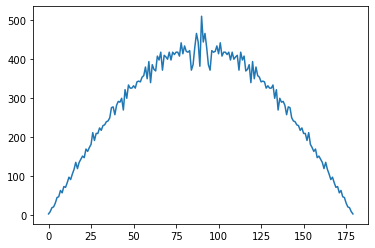

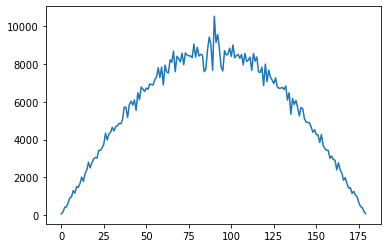

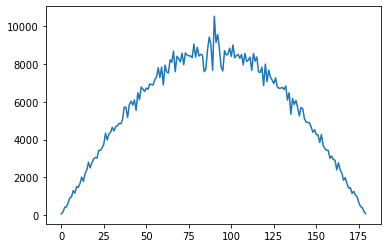

In [284]:
px_vector_ab = np.array([np.sin(theta_a) * np.cos(phi_a),
                       np.sin(theta_a) * np.sin(phi_a),
                       np.cos(theta_a)])
px_vector_ab = norm(px_vector_ab)

v_vector = np.array([np.sin(theta_v) * np.cos(phi_v),
                       np.sin(theta_v) * np.sin(phi_v),
                       np.cos(theta_v)])

v_vector = norm(v_vector)


npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))

print(theta)

alpha_lis = []

for t,p in zip(theta,phi):
    px_vector = np.array([np.sin(t) * np.cos(p),
                       np.sin(t) * np.sin(p),
                       np.cos(t)])



    alpha = np.arccos(np.dot(v_vector, px_vector))
    
    alpha_lis.append(alpha)

alpha_arr = np.array(alpha_lis)
print(alpha_arr)
print(alpha_arr.shape)
print(count.shape)

#histogram of alpha
histo_alpha = np.histogram(alpha_arr, 180,(0, np.pi))
plt.figure()
plt.plot(histo_alpha[0])

#histogram of alpha with weight of map
histo_map = np.histogram(alpha_arr,180,(0 ,np.pi),None,density_initial)
plt.figure()
plt.plot(histo_map[0])
#histogram of alpha with weight of mapA
histo_map_ab = np.histogram(alpha_arr, 180, (0 ,np.pi),None, density_aberr)
plt.figure()
plt.plot(histo_map[0])




81.38020833333333
[        nan 84.5        83.5        79.16666667 82.07142857 83.5
 80.33333333 80.8        82.31818182 78.2        83.92307692 78.9
 83.19230769 82.30769231 81.05       80.5        80.55       79.9
 80.46428571 82.22916667 83.26923077 80.76190476 82.375      79.38636364
 82.92857143 80.26315789 81.7173913  82.375      83.09677419 80.95652174
 82.1875     81.46296296 81.77777778 80.73333333 81.36206897 82.54054054
 78.46428571 81.01388889 81.36666667 80.83823529 81.4        81.42857143
 81.98529412 81.34615385 81.11764706 82.6625     80.69512195 82.64705882
 81.17045455 81.29268293 80.95238095 81.         79.25510204 81.5
 80.25609756 82.17045455 82.19565217 80.40196078 80.98333333 81.93518519
 80.2745098  82.09090909 80.67708333 80.73333333 81.20833333 80.703125
 82.41803279 81.19318182 82.84210526 81.10294118 80.78676471 80.47142857
 80.89655172 80.51190476 81.97014925 80.36764706 79.58823529 82.62857143
 81.55263158 81.59615385 81.84177215 82.14705882 81.59589041 80

<ipython-input-252-52de9030ed90>:4: RuntimeWarning: invalid value encountered in true_divide
  print(histo_map[0] / histo_alpha[0])
<ipython-input-252-52de9030ed90>:5: RuntimeWarning: invalid value encountered in true_divide
  dense = ((histo_map[0] / histo_alpha[0]) / mean_dens ) - 1


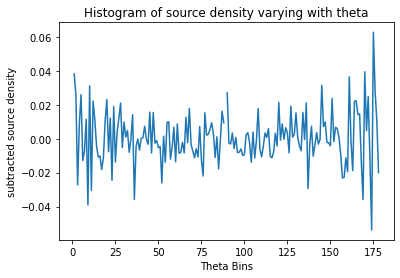

In [252]:
# source density for non aberrated -expected to be uniform
mean_dens = num_sources / npix 
print(mean_dens)
print(histo_map[0] / histo_alpha[0])
dense = ((histo_map[0] / histo_alpha[0]) / mean_dens ) - 1

plt.figure()
plt.plot(dense)
plt.xlabel('Theta Bins')
plt.ylabel('subtracted source density')
plt.title('Histogram of source density varying with theta')
plt.show()

<ipython-input-253-f1b4053f5439>:2: RuntimeWarning: invalid value encountered in true_divide
  dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1


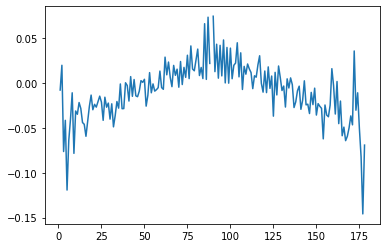

In [253]:
# source density  for aberrated -  expected to follow figure 3 from notes
dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1
plt.figure()
plt.plot(dense)

[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
[1.55275462 1.58883803 1.58883803 ... 1.58883803 1.58883803 1.55275462]
(12288,)
(12288,)


<ipython-input-279-20a9327ee49d>:78: RuntimeWarning: invalid value encountered in true_divide
  dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1


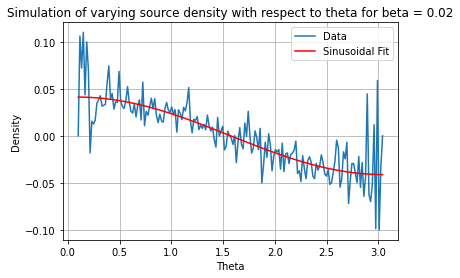

[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
[1.55275462 1.58883803 1.58883803 ... 1.58883803 1.58883803 1.55275462]
(12288,)
(12288,)


<ipython-input-279-20a9327ee49d>:78: RuntimeWarning: invalid value encountered in true_divide
  dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1


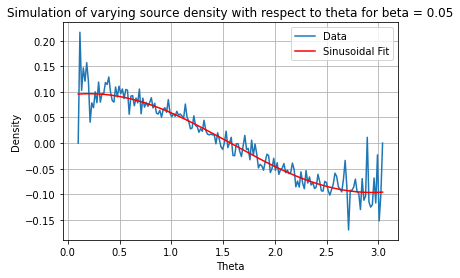

[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
[1.55275462 1.58883803 1.58883803 ... 1.58883803 1.58883803 1.55275462]
(12288,)
(12288,)


<ipython-input-279-20a9327ee49d>:78: RuntimeWarning: invalid value encountered in true_divide
  dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1


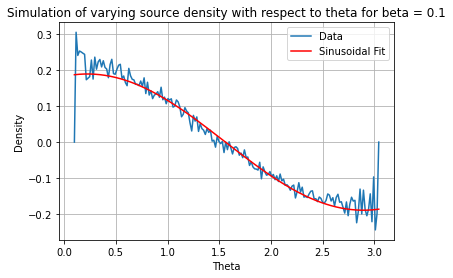

In [279]:
#Simulation of figure 3 from prof's notes
from scipy.optimize import curve_fit
# src_idx = generate_uniform_sources(num_sources, nside)
nside
xrnd = np.random.rand(num_sources)
theta_orig = np.arccos(1-2*xrnd)
phi_orig = np.random.rand(num_sources)*2.*np.pi

def sin_func(x, A, B, C):
    return A * np.sin(B * x + C)

theta_values = np.linspace(0.1, np.pi-0.1, 180)
starting_values = [0.05, 0.1, 0.25]

beta = [0.02,0.05,0.1]
for b, starting_value in zip(beta, starting_values):
    velocity = b * 3e8

    theta_diffA = np.zeros(num_sources)
    phi_diffA = np.zeros(num_sources)

    theta_v = np.pi/2
    phi_v = 0
    # theta_orig, phi_orig = hp.pix2ang(nside, src_idx)
    src_idx = hp.ang2pix(nside, theta_orig, phi_orig)
    theta_a, phi_a = aberrate_2(theta_orig, phi_orig,theta_v ,phi_v, velocity)
    idxA= hp.ang2pix(nside, theta_a, phi_a)

    density_initial = np.bincount(src_idx.astype(int), minlength=npix)
    density_aberr = np.bincount(idxA.astype(int), minlength=npix)
    mean_dens = num_sources / npix 

    px_vector_ab = np.array([np.sin(theta_a) * np.cos(phi_a),
                       np.sin(theta_a) * np.sin(phi_a),
                       np.cos(theta_a)])
    px_vector_ab = norm(px_vector_ab)

    v_vector = np.array([np.sin(theta_v) * np.cos(phi_v),
                       np.sin(theta_v) * np.sin(phi_v),
                       np.cos(theta_v)])

    v_vector = norm(v_vector)


    npix = hp.nside2npix(nside)
    theta, phi = hp.pix2ang(nside, np.arange(npix))

    print(theta)

    alpha_lis = []

    for t,p in zip(theta,phi):
        px_vector = np.array([np.sin(t) * np.cos(p),
                       np.sin(t) * np.sin(p),
                       np.cos(t)])



        alpha = np.arccos(np.dot(v_vector, px_vector))
    
        alpha_lis.append(alpha)

    alpha_arr = np.array(alpha_lis)
    print(alpha_arr)
    print(alpha_arr.shape)
    print(count.shape)

    #histogram of alpha
    histo_alpha = np.histogram(alpha_arr, 180,(0, np.pi))

    #histogram of alpha with weight of map
    histo_map = np.histogram(alpha_arr,180,(0 ,np.pi),None,density_initial)

    #histogram of alpha with weight of mapA
    histo_map_ab = np.histogram(alpha_arr, 180, (0 ,np.pi),None, density_aberr)

    # source density  for aberrated -  expected to follow figure 3 from notes
    dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1
    dense[np.where(histo_map_ab[0] == 0)] = 0
    popt, _ = curve_fit(sin_func, theta_values, dense, p0=[1, 1, starting_value])

    # Plot the histogram and the sinusoidal fit curve
    plt.figure()
    plt.plot(theta_values, dense, label='Data')
    plt.plot(theta_values, sin_func(theta_values, *popt), 'r-', label='Sinusoidal Fit')

    plt.xlabel('Theta')
    plt.ylabel('Density')
    plt.title(f'Simulation of varying source density with respect to theta for beta = {b}')
    plt.legend()
    plt.grid(True)

    plt.show()
    

[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
(12288,)
(12288,)


<ipython-input-276-527a8c73f289>:69: RuntimeWarning: invalid value encountered in true_divide
  dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1


[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
(12288,)
(12288,)


<ipython-input-276-527a8c73f289>:69: RuntimeWarning: invalid value encountered in true_divide
  dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1


[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
[0.02551621 0.02551621 0.02551621 ... 3.11607644 3.11607644 3.11607644]
(12288,)
(12288,)


<ipython-input-276-527a8c73f289>:69: RuntimeWarning: invalid value encountered in true_divide
  dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1


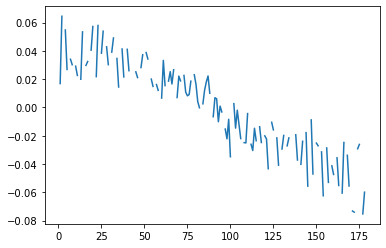

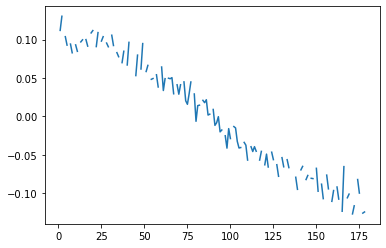

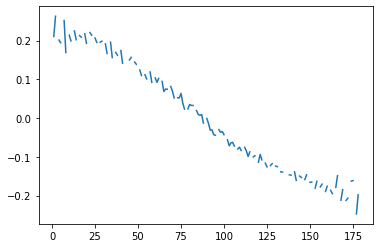

In [276]:

# src_idx = generate_uniform_sources(num_sources, nside)
xrnd = np.random.rand(num_sources)
theta_orig = np.arccos(1-2*xrnd)
phi_orig = np.random.rand(num_sources)*2.*np.pi

beta = [0.02,0.05,0.1]
for b in beta:
    velocity = b * 3e8

    theta_diffA = np.zeros(num_sources)
    phi_diffA = np.zeros(num_sources)

    theta_v = 0
    phi_v = 0
    # theta_orig, phi_orig = hp.pix2ang(nside, src_idx)
    src_idx = hp.ang2pix(nside, theta_orig, phi_orig)
    theta_a, phi_a = aberrate_2(theta_orig, phi_orig,theta_v ,phi_v, velocity)
    idxA= hp.ang2pix(nside, theta_a, phi_a)

    density_initial = np.bincount(src_idx.astype(int), minlength=npix)
    density_aberr = np.bincount(idxA.astype(int), minlength=npix)
    mean_dens = num_sources / npix 

    px_vector_ab = np.array([np.sin(theta_a) * np.cos(phi_a),
                       np.sin(theta_a) * np.sin(phi_a),
                       np.cos(theta_a)])
    px_vector_ab = norm(px_vector_ab)

    v_vector = np.array([np.sin(theta_v) * np.cos(phi_v),
                       np.sin(theta_v) * np.sin(phi_v),
                       np.cos(theta_v)])

    v_vector = norm(v_vector)


    npix = hp.nside2npix(nside)
    theta, phi = hp.pix2ang(nside, np.arange(npix))

    print(theta)

    alpha_lis = []

    for t,p in zip(theta,phi):
        px_vector = np.array([np.sin(t) * np.cos(p),
                       np.sin(t) * np.sin(p),
                       np.cos(t)])



        alpha = np.arccos(np.dot(v_vector, px_vector))
    
        alpha_lis.append(alpha)

    alpha_arr = np.array(alpha_lis)
    print(alpha_arr)
    print(alpha_arr.shape)
    print(count.shape)

    #histogram of alpha
    histo_alpha = np.histogram(alpha_arr, 180,(0, np.pi))

    #histogram of alpha with weight of map
    histo_map = np.histogram(alpha_arr,180,(0 ,np.pi),None,density_initial)

    #histogram of alpha with weight of mapA
    histo_map_ab = np.histogram(alpha_arr, 180, (0 ,np.pi),None, density_aberr)

    # source density  for aberrated -  expected to follow figure 3 from notes
    dense = ((histo_map_ab[0] / histo_alpha[0]) / mean_dens) -1
    plt.figure()
    plt.plot(dense)



12288


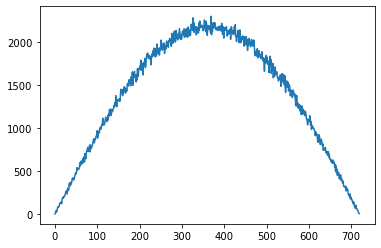

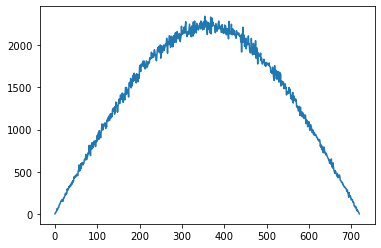

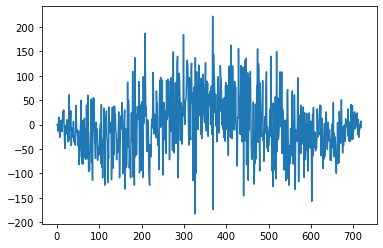

In [256]:
#histogram with aberrate_2
velocity=6.e7
num_sources = 1000000
# src_idx = generate_uniform_sources(num_sources, nside)
x = np.random.rand(num_sources)
theta_orig = np.arccos(1-2*x)
phi_orig = np.random.rand(num_sources)*2.*np.pi
print(hp.nside2npix(32))

#print(theta_orig)
#print(phi_orig)

theta_a, phi_a = aberrate_2(theta_orig, phi_orig,np.pi/2,0, velocity)

htet=np.histogram(theta_orig,720,(0.,np.pi))
htetA=np.histogram(theta_a,720,(0.,np.pi))

dhtet=htetA[0]-htet[0]

plt.figure()
plt.plot(htet[0])

plt.figure()
plt.plot(htetA[0])

plt.figure()
plt.plot(dhtet)
plt.show()

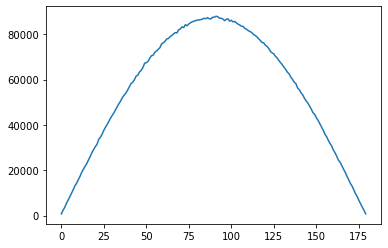

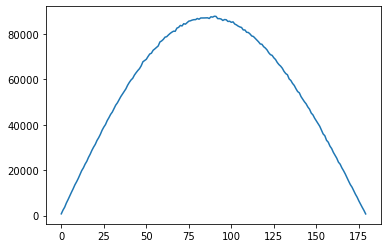

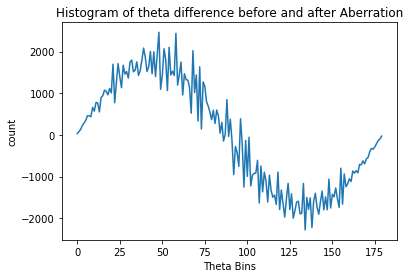

In [257]:
# histogram for normal aberrate code, 1- distribution of theta. 2- distribution of theta_a. 3- histogram of the difference of two, 
velocity=6.e6
num_sources = 10000000
# src_idx = generate_uniform_sources(num_sources, nside)
x = np.random.rand(num_sources)
theta_orig = np.arccos(1-2*x)
phi_orig = np.random.rand(num_sources)*2.*np.pi


theta_a, phi_a = aberrate(theta_orig, phi_orig,velocity)
diff = theta_a - theta_orig

htet=np.histogram(theta_orig,180,(0.,np.pi))
htetA=np.histogram(theta_a,180,(0.,np.pi))

dhtet=htetA[0]-htet[0]

plt.figure()
plt.plot(htet[0])

plt.figure()
plt.plot(htetA[0])

plt.figure()
plt.plot(dhtet)
plt.xlabel('Theta Bins')
plt.ylabel('count')
plt.title('Histogram of theta difference before and after Aberration')
plt.show()

moydens= 20.345052083333332


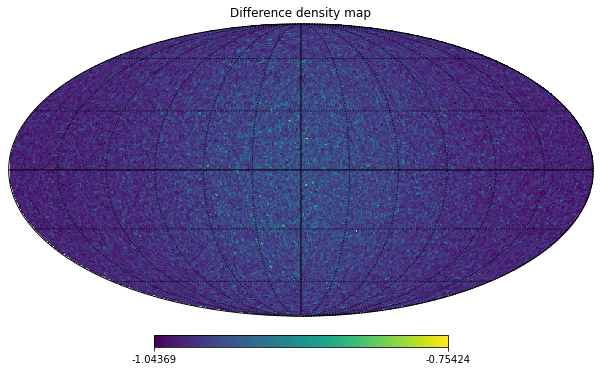

In [258]:
moydens=np.mean(density_initial)
print('moydens=',moydens)
diff_dens_norm = (diff_density-moydens)/moydens
hp.mollview(diff_dens_norm, title='Difference density map', cmap='viridis',cbar=True)
hp.graticule()
plt.show()